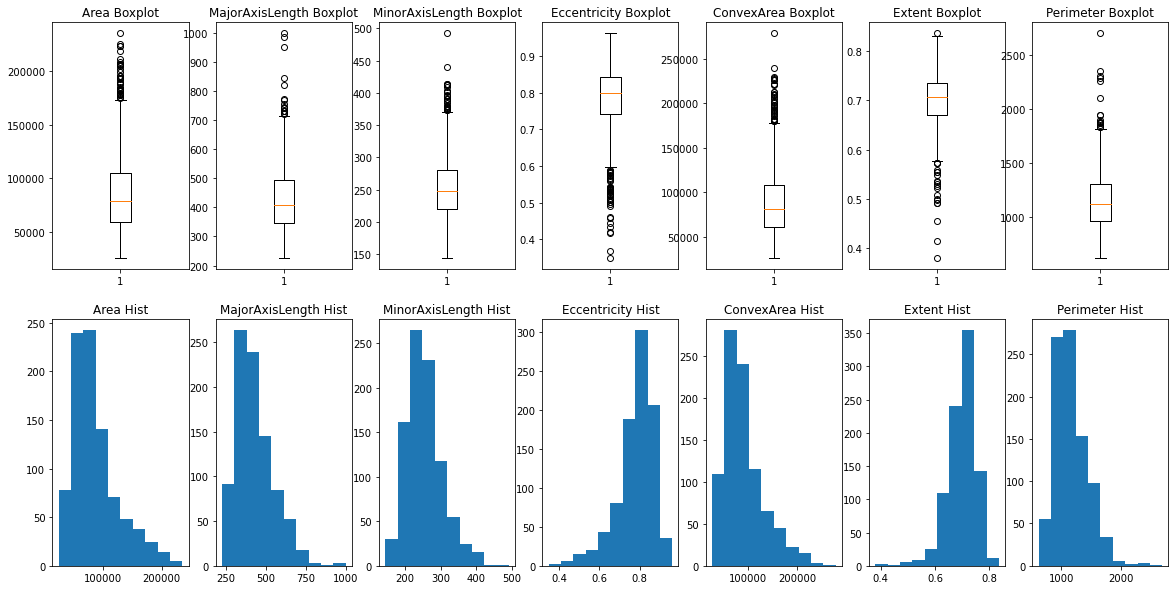

In [213]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
from sklearn import tree
import sklearn.model_selection
from sklearn import preprocessing

data=pd.read_excel('Raisin_Dataset/Raisin_Dataset.xlsx')
data.to_numpy()
data=data.values
X = data[:,:-1]
y = data[:,7]
#data = preprocessing.scale(data[:,:-1])
#X = preprocessing.scale(X)


atDict = {}
Attributes = ['Area','MajorAxisLength', 'MinorAxisLength','Eccentricity', 'ConvexArea', 'Extent', 'Perimeter' ]
for i in range(len(Attributes)):
    atDict[Attributes[i]] = data[:,i]
#print(atDict['MajorAxisLength'])
atDict['class'] = y

#bools = (atDict['MajorAxisLength'] > 422.423) & (atDict['MajorAxisLength'] <= 452.894) & (atDict['ConvexArea'] <= 77974) 

    
figure, ax = plt.subplots(2,7, figsize=(20,10))
for i in range(len(Attributes)):
    ax[0, i].boxplot(atDict[Attributes[i]])
    ax[0, i].set_title(Attributes[i]+" Boxplot")
    ax[1,i].hist([atDict[Attributes[i]]])
    ax[1,i].set_title(Attributes[i] +" Hist")







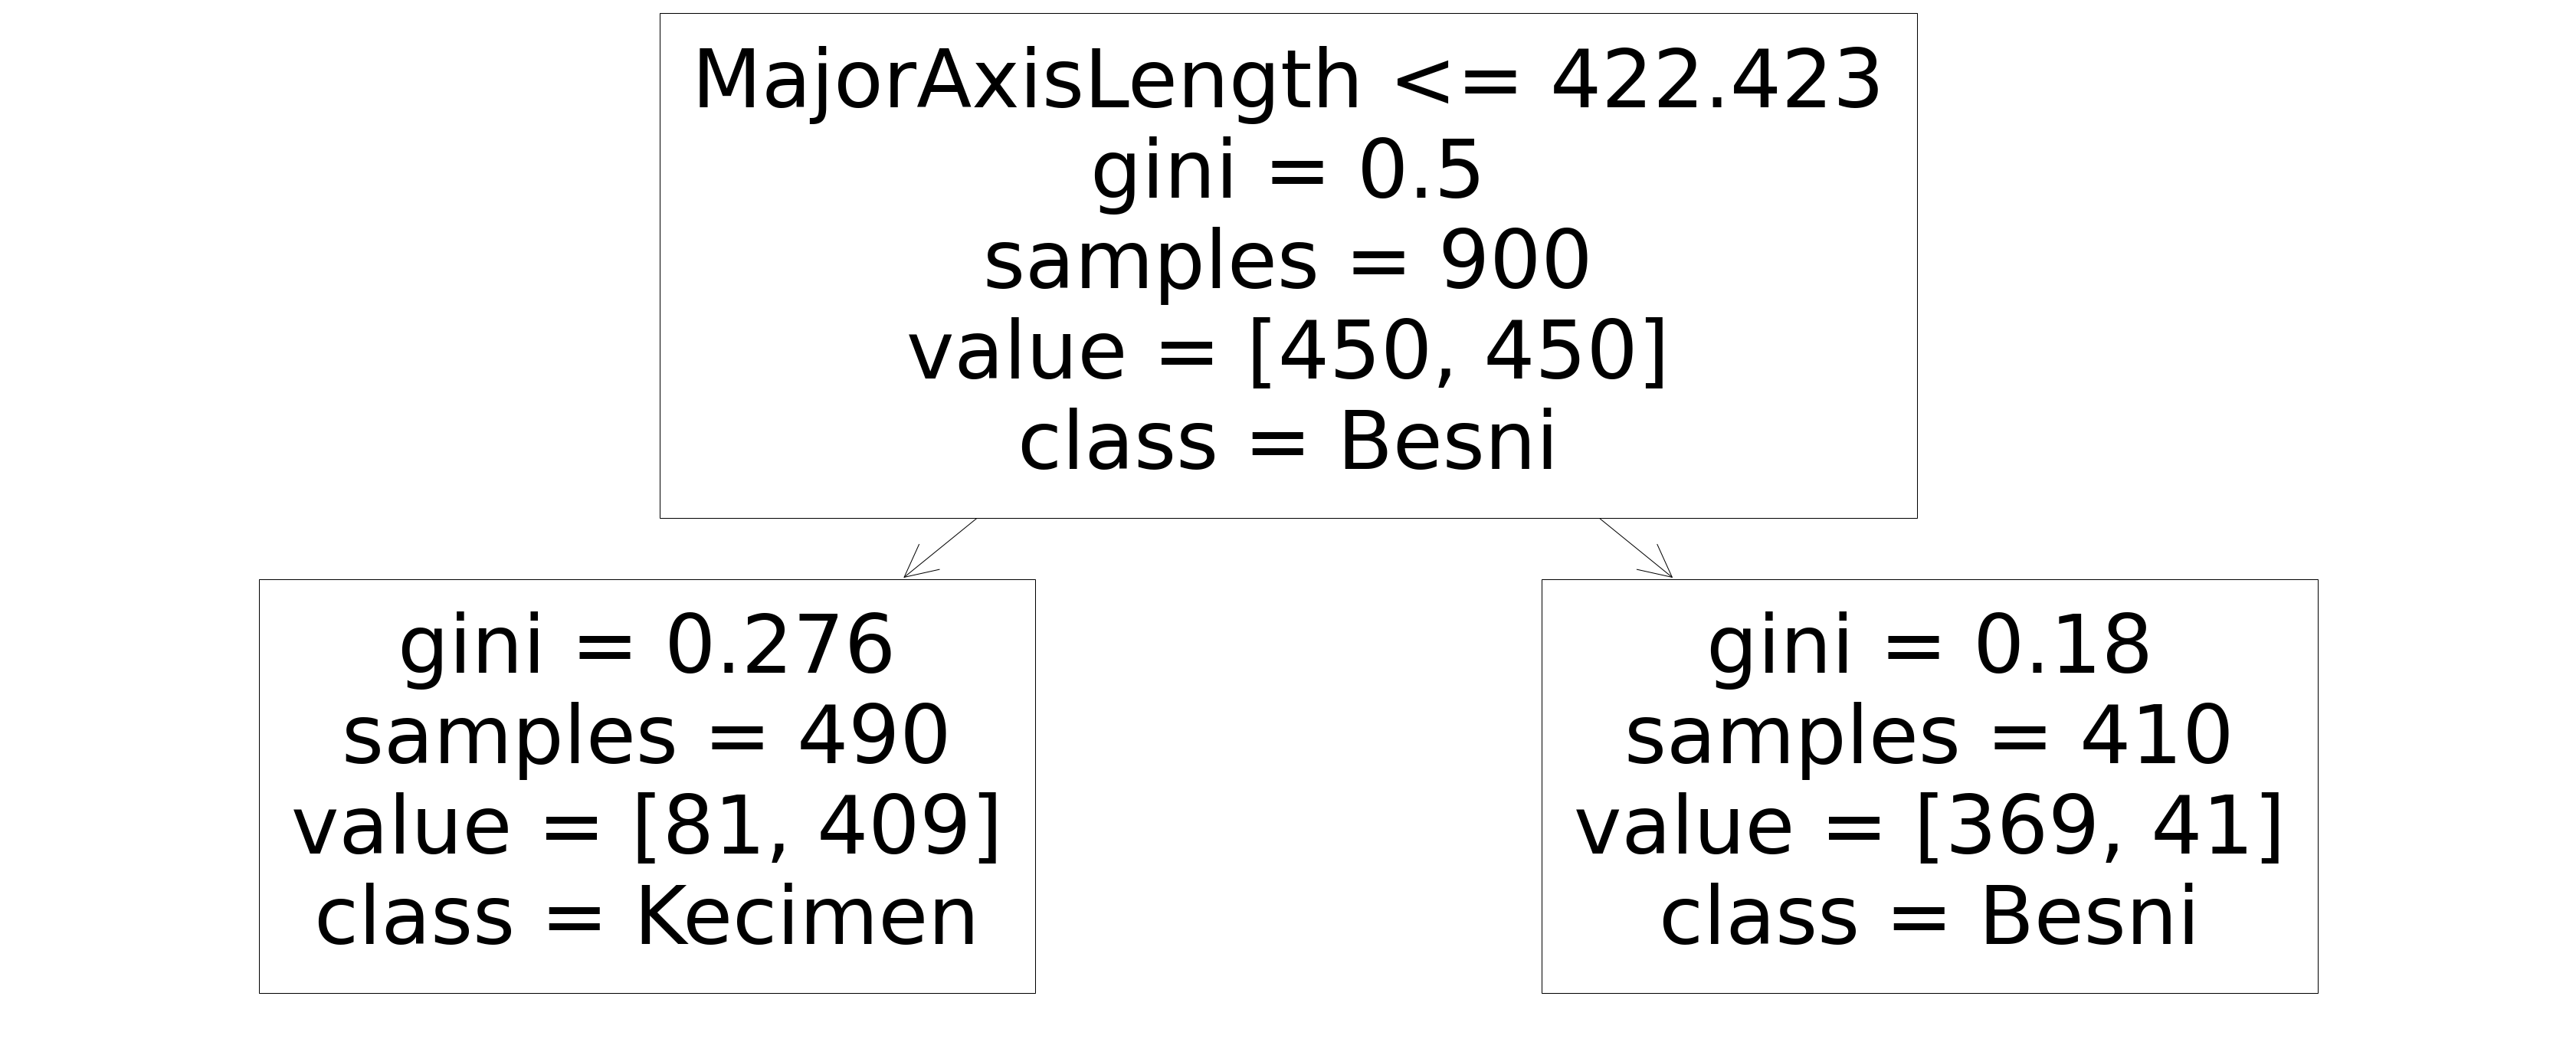

In [214]:
#print(Attributes[i])
#print(atDict[Attributes[i]])



#?tree.DecisionTreeClassifier
#min_samples_split: The minimum number of samples required to split an internal node:

dtc = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=500)
dtc = dtc.fit(X, atDict['class'])

classNames = dtc.classes_


plt.figure(figsize=[60,25])
tree.plot_tree(dtc, feature_names=Attributes, class_names=classNames)
plt.savefig('decision_tree.png', transparent = False)
plt.show()



In [215]:

skf = sklearn.model_selection.StratifiedKFold(n_splits=10)
accuracies =[]
auc_scores = []
for train, test in skf.split(X,y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    
    y_pred_prob = dtc.predict_proba(X_test)
    
    
    score =  roc_auc_score(y_test, preditcted_probabilities[:,0])
    auc_scores.append(score)
    
    
    
    accuracy =  sklearn.metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_auc_score = np.average(np.array(auc_scores))
average_accuracy_score = np.average(np.array(accuracies))

print(average_accuracy_score)
print(average_auc_score)

0.8533333333333333
0.8930864197530862


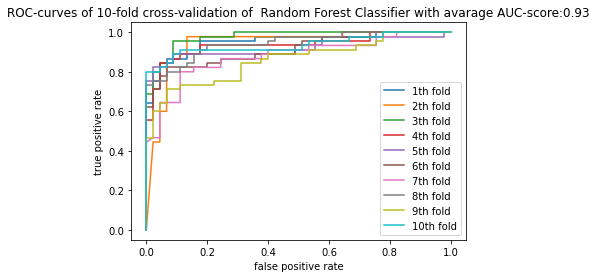

0.8688888888888888
0.9254567901234567


In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
skf = sklearn.model_selection.StratifiedKFold(n_splits=10)

clf = RandomForestClassifier( max_depth= 8, random_state= 23)
accuracies =[]
auc_scores =[]
fpr_list, tpr_list = [], []
i = 0
y = y =='Besni'
for train, test in skf.split(X,y):
    i=i+1
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
      
    clf = clf.fit(X_train, y_train)
    preditcted_probabilities = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    

    score =  roc_auc_score(y_test, preditcted_probabilities[:,1])
    auc_scores.append(score)
    
        
    accuracy =  sklearn.metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    fpr, tpr, thresholds = roc_curve(y_test, preditcted_probabilities[:,1])
    plt.plot(fpr, tpr, label = str(i)+'th fold' )

    
average_accuracy_score = np.average(np.array(accuracies))    
average_auc_score = np.average(np.array(auc_scores))
plt.title("ROC-curves of 10-fold cross-validation of  Random Forest Classifier with avarage AUC-score:" + str(np.round(average_auc_score, 2)))
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()


print(average_accuracy_score)
print(average_auc_score)

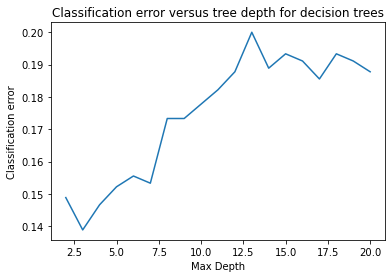

Average classification error of 10-fold crossvalidation as a function of the tree depth.


In [217]:




    
error_square = []

for train, test in skf.split(X, y):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    list_errors = []
    for depth in range (2, 21):
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth)
        dtc = dtc.fit(X_train, y_train)
        y_pred_test = dtc.predict(X_test)
        accuracy_testdata = sklearn.metrics.accuracy_score(y_test, y_pred_test)
        error= 1 - accuracy_testdata
        list_errors.append(error)
  #  list_accuracies_train.append(accuracy_traindata)
    error_square.append(list_errors)
error_square = np.array(error_square)
average_classification_error = []
for i in range(len(error_square[0])):
    average_classification_error.append(np.average(error_square[:,i]))


list_depths = []
for depth in range (2, 21):
    list_depths.append(depth)    
    
plt.figure()
plt.plot(list_depths, average_classification_error)
#plt.plot(list_depths, list_accuracies_train, label = "training accuracy")
plt.xlabel('Max Depth')
plt.ylabel('Classification error')
plt.title('Classification error versus tree depth for decision trees')
plt.show()
print('Average classification error of 10-fold crossvalidation as a function of the tree depth.')









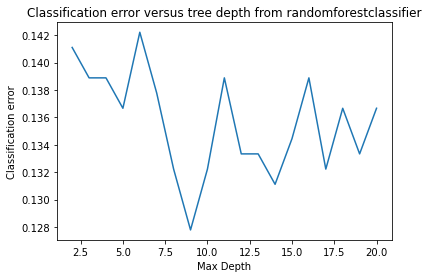

Average classification error of 10-fold crossvalidation as a function of the tree depth.


In [218]:


error_square = []

for train, test in skf.split(X, y):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    list_errors = []
    for depth in range (2, 21):
        clf = RandomForestClassifier( max_depth= depth, random_state= 105)
        clf = clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        accuracy_testdata = sklearn.metrics.accuracy_score(y_test, y_pred_test)
        error= 1 - accuracy_testdata
        list_errors.append(error)
  #  list_accuracies_train.append(accuracy_traindata)
    error_square.append(list_errors)
error_square = np.array(error_square)
average_classification_error = []
for i in range(len(error_square[0])):
    average_classification_error.append(np.average(error_square[:,i]))

list_depths = []
for depth in range (2, 21):
    list_depths.append(depth)    
    
plt.figure()
plt.plot(list_depths, average_classification_error)
#plt.plot(list_depths, list_accuracies_train, label = "training accuracy")
plt.xlabel('Max Depth')
plt.ylabel('Classification error')
plt.title('Classification error versus tree depth from randomforestclassifier')
plt.show()
print('Average classification error of 10-fold crossvalidation as a function of the tree depth.')







In [219]:
from sklearn.neural_network import MLPClassifier



auc_scores = []
for train, test in skf.split(X, y):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
     
    clf = MLPClassifier(
                  random_state=2, solver = 'adam', learning_rate = 'adaptive', max_iter = 2000)
    clf.fit(X_train,y_train)
    
    preditcted_probabilities = clf.predict_proba(X_test)
    
    score =  roc_auc_score(y_test, preditcted_probabilities[:,1])
    auc_scores.append(score)

auc_scores = np.array(auc_scores)

print(np.average(auc_scores))

 

0.6087901234567902
